### Import Merged NBA Game Data

In [1]:
import pandas as pd
NBA_Games=pd.read_csv("../../Data/Week 2/NBA_Games.csv")
NBA_Games.head()

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF
0,Indiana,Indiana Pacers,1610612754,Pacers,Indiana,1976,12013,IND,11300002,10/5/2013,...,38,15,12,8,15,23,-6.0,49,122,6.0
1,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300002,10/5/2013,...,56,20,5,10,23,25,6.0,54,114,6.0
2,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,12013,HOU,11300003,10/5/2013,...,35,24,9,4,22,27,-1.0,76,128,1.0
3,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002,12013,NOP,11300003,10/5/2013,...,33,17,12,4,15,32,1.0,74,136,1.0
4,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,12013,GSW,11300004,10/5/2013,...,52,21,13,5,23,31,-9.0,60,137,9.0


## Explore the dataset

### Qualitative (Categorical) vs. Quantitative (Numerical) Data
-- To assess the variable type in Python, we use the “dtypes” command.

- object: qualitative variable -- variables that are not in numerical form 
- int64: quantitative & discrete -- integer 
- float64: quantitative & continuous -- real numbers that may contain decimal points

In [2]:
NBA_Games.dtypes

CITY                  object
TEAM_NAME             object
TEAM_ID                int64
NICKNAME              object
STATE                 object
YEAR_FOUNDED           int64
SEASON_ID              int64
TEAM_ABBREVIATION     object
GAME_ID                int64
GAME_DATE             object
MATCHUP               object
WL                    object
MIN                    int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS           float64
GM                     int64
GA                     int64
POINT_DIFF    

In data analysis, we often convert categorical variable into dummy variable, if the observation belongs to the specified category, the dummy variable indicating the category would equal to 1, otherwise it equals to 0.

### Convert a categorical variable to a dummy variable
_The variable "WL" only carries two values, win or lose. We will create dummy variables to capture the categories._ 

We can use the “pd.get_dummies” function to convert a categorical variable to dummy variable. This function will also omit any missing value.

In [3]:
dummy=pd.get_dummies(NBA_Games, columns=['WL'])

In [4]:
dummy.columns

Index(['CITY', 'TEAM_NAME', 'TEAM_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED',
       'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PLUS_MINUS', 'GM', 'GA', 'POINT_DIFF', 'WL_L', 'WL_W'],
      dtype='object')

In [5]:
dummy.head()

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WL_L,WL_W
0,Indiana,Indiana Pacers,1610612754,Pacers,Indiana,1976,12013,IND,11300002,10/5/2013,...,12,8,15,23,-6.0,49,122,6.0,1,0
1,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300002,10/5/2013,...,5,10,23,25,6.0,54,114,6.0,0,1
2,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,12013,HOU,11300003,10/5/2013,...,9,4,22,27,-1.0,76,128,1.0,1,0
3,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002,12013,NOP,11300003,10/5/2013,...,12,4,15,32,1.0,74,136,1.0,0,1
4,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,12013,GSW,11300004,10/5/2013,...,13,5,23,31,-9.0,60,137,9.0,1,0


Notice that two variables are created, WL_L and WL_W. WL_L=1 if the team lost and WL_L=0 if the team won. The original variable WL is deleted.

#### We can attach the "WL_W" dummy variable back to our NBA_Games dataset using the pd.concat function.
- axis=1 specifies that we are adding a column to the dataset; 
- axis=0 indicates adding rows 


In [6]:
NBA_Games=pd.concat([NBA_Games, dummy['WL_W']], axis=1)
NBA_Games.head() 

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WL_W
0,Indiana,Indiana Pacers,1610612754,Pacers,Indiana,1976,12013,IND,11300002,10/5/2013,...,15,12,8,15,23,-6.0,49,122,6.0,0
1,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300002,10/5/2013,...,20,5,10,23,25,6.0,54,114,6.0,1
2,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,12013,HOU,11300003,10/5/2013,...,24,9,4,22,27,-1.0,76,128,1.0,0
3,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002,12013,NOP,11300003,10/5/2013,...,17,12,4,15,32,1.0,74,136,1.0,1
4,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,12013,GSW,11300004,10/5/2013,...,21,13,5,23,31,-9.0,60,137,9.0,0


#### Rename "WL_W" to "WIN"


In [7]:
NBA_Games.rename(columns={'WL_W':'WIN'}, inplace=True)
NBA_Games.head()

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
0,Indiana,Indiana Pacers,1610612754,Pacers,Indiana,1976,12013,IND,11300002,10/5/2013,...,15,12,8,15,23,-6.0,49,122,6.0,0
1,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300002,10/5/2013,...,20,5,10,23,25,6.0,54,114,6.0,1
2,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,12013,HOU,11300003,10/5/2013,...,24,9,4,22,27,-1.0,76,128,1.0,0
3,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002,12013,NOP,11300003,10/5/2013,...,17,12,4,15,32,1.0,74,136,1.0,1
4,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,12013,GSW,11300004,10/5/2013,...,21,13,5,23,31,-9.0,60,137,9.0,0


### Working with date variable

In sports, we often have to work with date and time data. 


In [8]:
NBA_Games['GAME_DATE'].dtype

dtype('O')

_The date variable is originally stored as an object. In this case, each date is treated equally without ordering._ 

#### We can use the “pd._to_datetime()” command to convert the object variable to a date variable.

In [9]:
import datetime
NBA_Games['GAME_DATE']=pd.to_datetime(NBA_Games['GAME_DATE'])
NBA_Games['GAME_DATE'].head()

0   2013-10-05
1   2013-10-05
2   2013-10-05
3   2013-10-05
4   2013-10-05
Name: GAME_DATE, dtype: datetime64[ns]

## Descriptive and Summary Analyses
### Summarize numerical data
We can use the “describe()” command to calculate summary statistics. This will return basic summary statistics for all the numerical variables which include the total number of observations (count), the average, standard deviation, min and max, median, and the first and third quartiles of the values of the variable.

In [10]:
NBA_Games.describe()

,TEAM_ID,YEAR_FOUNDED,SEASON_ID,GAME_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
count,1.777900e+04,17779.000000,17779.000000,1.777900e+04,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,...,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000
mean,1.610613e+09,1969.512402,22692.567130,1.183556e+08,239.157433,102.423421,37.944035,83.974127,0.452485,9.037629,...,22.082851,7.785309,4.819225,13.963890,20.673885,-0.002666,64.479386,132.732775,11.187525,0.499972
std,8.676904e+00,16.503036,5534.895754,3.655546e+08,12.496399,13.598390,5.646131,8.337715,0.056357,3.724917,...,5.463359,2.962259,2.520843,4.024721,4.563555,13.889791,9.140930,13.939872,8.254579,0.500014
min,1.610613e+09,1946.000000,12013.000000,1.130000e+07,170.000000,47.000000,15.000000,46.000000,0.217000,0.000000,...,2.000000,0.000000,0.000000,2.000000,7.000000,-61.000000,29.000000,75.000000,-42.000000,0.000000
25%,1.610613e+09,1949.000000,22014.000000,2.140029e+07,239.000000,93.000000,34.000000,79.000000,0.414000,6.000000,...,18.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,58.000000,123.000000,5.000000,0.000000
50%,1.610613e+09,1970.000000,22015.000000,2.160015e+07,240.000000,103.000000,38.000000,84.000000,0.452000,9.000000,...,22.000000,8.000000,5.000000,14.000000,20.000000,0.000000,64.000000,132.000000,9.000000,0.000000
75%,1.610613e+09,1980.000000,22017.000000,2.180007e+07,241.000000,112.000000,42.000000,89.000000,0.489000,11.000000,...,26.000000,10.000000,6.000000,16.000000,24.000000,9.000000,71.000000,142.000000,16.000000,1.000000
max,1.610613e+09,2002.000000,42018.000000,1.621900e+09,341.000000,168.000000,61.000000,129.000000,0.684000,27.000000,...,47.000000,21.000000,19.000000,35.000000,45.000000,61.000000,112.000000,215.000000,61.000000,1.000000


#### We can also add non-numerical variable into this summary statistics table by adding the argument “include=’all’”. You will see that for non-numerical variables, it provides the number of distinct values in the variable and the most frequently appeared value of the variable as well as its frequency. For date variable, in addition to providing the most frequent date appeared in the dataset, it also summarizes the start and end dates of the dataset.


In [11]:
NBA_Games.describe(include='all')

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
count,17779,17779,1.777900e+04,17779,17779,17779.000000,17779.000000,17779,1.777900e+04,17779,...,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000,17779.000000
unique,29,30,NaN,30,23,NaN,NaN,30,NaN,1559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Los Angeles,Golden State Warriors,NaN,Warriors,California,NaN,NaN,GSW,NaN,2015-04-15 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,816,688,NaN,688,2068,NaN,NaN,688,NaN,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-09 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-15 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.610613e+09,NaN,NaN,1969.512402,22692.567130,NaN,1.183556e+08,NaN,...,22.082851,7.785309,4.819225,13.963890,20.673885,-0.002666,64.479386,132.732775,11.187525,0.499972
std,NaN,NaN,8.676904e+00,NaN,NaN,16.503036,5534.895754,NaN,3.655546e+08,NaN,...,5.463359,2.962259,2.520843,4.024721,4.563555,13.889791,9.140930,13.939872,8.254579,0.500014
min,NaN,NaN,1.610613e+09,NaN,NaN,1946.000000,12013.000000,NaN,1.130000e+07,NaN,...,2.000000,0.000000,0.000000,2.000000,7.000000,-61.000000,29.000000,75.000000,-42.000000,0.000000
25%,NaN,NaN,1.610613e+09,NaN,NaN,1949.000000,22014.000000,NaN,2.140029e+07,NaN,...,18.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,58.000000,123.000000,5.000000,0.000000


#### We can summarize a single variable by specifying the variable.


In [12]:
NBA_Games['PTS'].describe()

count    17779.000000
mean       102.423421
std         13.598390
min         47.000000
25%         93.000000
50%        103.000000
75%        112.000000
max        168.000000
Name: PTS, dtype: float64

#### We can also calculate individual statistics by using the mean(), median(), std().
- Calculate mean of a numerical variable


In [13]:
NBA_Games['FGM'].mean()

37.94403509758704

- Calculate median of a numerical variable


In [14]:
NBA_Games['FGM'].median()

38.0

- Calculate standard deviation of a numerical variable


In [15]:
NBA_Games['FGM'].std()

5.646131461395677

## Self Test
1. Find the mean of field goals attempted;

2. Find the median of 3-point field goals made;

3. Find the standard deviation of the number of rebounds


In [16]:
#Your Code Here
print(NBA_Games.FGA.mean())
print(NBA_Games.FG3M.median())
print(NBA_Games.REB.std())

83.97412677878395
9.0
6.709445109944509


#### We can also calculate the summary statistics of a variable based on another variable, usually based on a different categorical variable.
- Calculate means by groups using "groupby" command.


In [17]:
NBA_Games.groupby(['WL']).mean()

,TEAM_ID,YEAR_FOUNDED,SEASON_ID,GAME_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
WL,,,,,,,,,,,,,,,,,,,,,
L,1.610613e+09,1969.210461,22692.529246,1.184346e+08,239.146119,96.821485,35.995388,84.260855,0.427531,8.182790,...,20.507312,7.388189,4.405287,14.407649,21.143982,-11.186862,60.826097,132.053093,11.175028,0
W,1.610613e+09,1969.814377,22692.605017,1.182767e+08,239.168748,108.025987,39.892901,83.687366,0.477441,9.892564,...,23.658567,8.182473,5.233210,13.520081,20.203735,11.182788,68.133086,133.412532,11.200022,1


- Calculate the mean of a single (points in this example) variable by group.


In [18]:
NBA_Games.groupby(['WL'])['PTS'].mean()

WL
L     96.821485
W    108.025987
Name: PTS, dtype: float64

#### Summarize date variable
- We can find some basic statistics of the date variable. The describe() function returns the number of unique value of the date variable, the most frequently appeared date, i.e., the date with most number of games, and the first and the last dates.

In [19]:
NBA_Games['GAME_DATE'].describe()

count                   17779
unique                   1559
top       2015-04-15 00:00:00
freq                       28
first     2013-03-09 00:00:00
last      2019-07-15 00:00:00
Name: GAME_DATE, dtype: object

## Visualizing data
### Histogram 
-- We can visualize the distribution of a variable using a histogram.


In [20]:
NBA_Games.hist(column='PTS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff482394588>]],
      dtype=object)

#### We can specify the number of bins in a histogram; different numbers of bins may give us slightly different graphs.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff480290390>]],
      dtype=object)

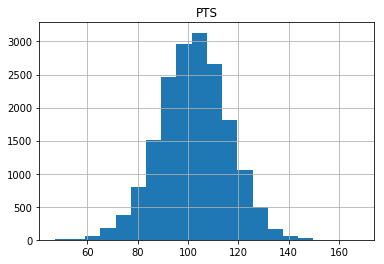

In [21]:
NBA_Games.hist(column='PTS', bins=20)

#### For visual appeal, sometimes it may be helpful to add space between bins.
_For example, we can narrow the bin to 0.9 width._


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4801aa0b8>]],
      dtype=object)

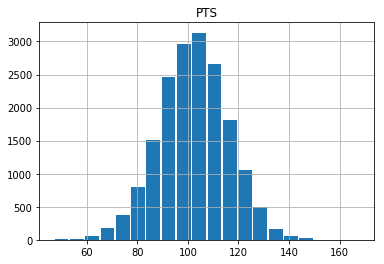

In [22]:
NBA_Games.hist(column='PTS', bins=20, rwidth=0.9)

### Save edited dataset


In [23]:
NBA_Games.to_csv("../../Data/Week 2/NBA_Games2.csv", index=False)